# **Field Analysis for Average nuEff**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Increase plot resolution
plt.rcParams["figure.dpi"] = 160
# Set paths and create output directory
run = "../run/"
output = "output"
!mkdir -p $output

In [2]:
it = 100
index005 = 63309

In [3]:
yp005_path = [run + 'flatPlate_Re1e7/turbulentFlatPlate_nuEff0.05/yplus_0.05/0.05yp_surfaceFields_iter_{}.csv'.format(i) for i in range(1, it + 1)]
yp005_data = [pd.read_csv(yp005_path[j], delim_whitespace=False, index_col=False) for j in range(it)]
yp005_data[1].head()

/home/jihookang/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


,x_center,y_face,avg_nuEff
0,0.000486,5.556758e-07,0.000014
1,0.001458,5.556758e-07,0.000014
2,0.002433,5.556758e-07,0.000014
3,0.003410,5.556758e-07,0.000014
4,0.004390,5.556758e-07,0.000014


In [4]:
yp100_path = [run + 'flatPlate_Re1e7/turbulentFlatPlate_nuEff100/yplus_100/100yp_surfaceFields_iter_{}.csv'.format(i) for i in range(1, it + 1)]
yp100_data = [pd.read_csv(yp100_path[j], delim_whitespace=False, index_col=False) for j in range(it)]
yp100_data[1].head()

/home/jihookang/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


,x_center,y_face,avg_nuEff
0,0.000486,0.001045,0.000033
1,0.001458,0.001045,0.000044
2,0.002433,0.001045,0.000049
3,0.003410,0.001045,0.000042
4,0.004390,0.001045,0.000040


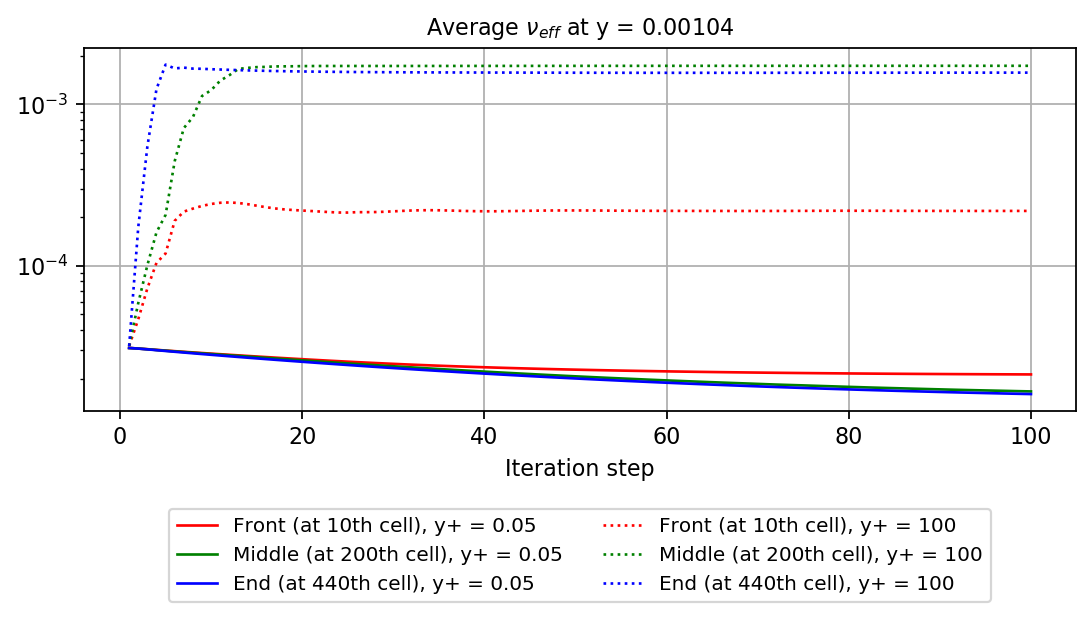

In [5]:
style = ["-", "--", ":", "-."]
lw = 1.2

# y_face_0.05 = 0.001043330676
# y_face_100 = 0.001044526213

fig, ax = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
plt.yscale("log")
ax.set_xlabel("Iteration step", fontsize = 10)
ax.tick_params(labelsize = 10)
plt.title(r"Average $\nu_{eff}$ at y = 0.00104", fontsize = 10)
ax.plot([i+1 for i in range(it)], [yp005_data[j]['avg_nuEff'][index005 + 9] for j in range(it)], ls = style[0], c = "r", lw = lw, label = "Front (at 10th cell), y+ = 0.05")
ax.plot([i+1 for i in range(it)], [yp005_data[j]['avg_nuEff'][index005 + 199] for j in range(it)], ls = style[0], c = "g", lw = lw, label = "Middle (at 200th cell), y+ = 0.05")
ax.plot([i+1 for i in range(it)], [yp005_data[j]['avg_nuEff'][index005 + 439] for j in range(it)], ls = style[0], c = "b", lw = lw, label = "End (at 440th cell), y+ = 0.05")
ax.plot([i+1 for i in range(it)], [yp100_data[j]['avg_nuEff'][9] for j in range(it)], ls = style[2], c = "r", lw = lw, label = "Front (at 10th cell), y+ = 100")
ax.plot([i+1 for i in range(it)], [yp100_data[j]['avg_nuEff'][199] for j in range(it)], ls = style[2], c = "g", lw = lw, label = "Middle (at 200th cell), y+ = 100")
ax.plot([i+1 for i in range(it)], [yp100_data[j]['avg_nuEff'][439] for j in range(it)], ls = style[2], c = "b", lw = lw, label = "End (at 440th cell), y+ = 100")
plt.legend(ncol=2, fontsize = 9, bbox_to_anchor=(0.5, -0.4), loc='center')
plt.savefig(output + "/2DflatPlate/averageNuEff.pdf", bbox_inches="tight")

In [6]:
yp10_path2 = [run + 'flatPlate_Re1e7/turbulentFlatPlate_corr_yp10/yplus_10/10yp_surfaceFields_iter_{}.csv'.format(i) for i in range(1, it + 1)]
yp10_data2 = [pd.read_csv(yp10_path2[j], delim_whitespace=False) for j in range(it)]
yp10_data2[1].head()

,ccx,1stFaceDistance,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,...,tau_y,skinFriction,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,0.000098,1.144023,0.760533,0.000016,0.000011,1.560606e+06,93.912168,-0.000003,1.364484e+06,...,-0.055924,0.008921,66.044046,0.037100,67.913177,0.169887,31.986193,31.876957,0.032714,0.995820
1,0.001458,0.000098,1.150396,0.840986,0.000016,0.000012,1.512871e+06,512.631194,-0.000002,1.318921e+06,...,-0.069463,0.008441,62.145264,0.068257,66.813502,0.156461,32.646013,32.546809,0.032714,0.961846
2,0.002433,0.000098,1.151081,1.247099,0.000016,0.000017,1.471665e+06,1933.727817,0.000003,1.279590e+06,...,-0.068585,0.007989,58.782942,0.079368,65.841178,0.135280,32.789516,32.704534,0.032714,0.932519
3,0.003410,0.000098,1.148870,1.424392,0.000016,0.000020,1.436279e+06,6041.236826,0.000006,1.245814e+06,...,-0.065683,0.007586,55.924008,0.085493,64.990602,0.116258,32.663664,32.591167,0.032714,0.907334
4,0.004390,0.000098,1.145648,1.673488,0.000016,0.000023,1.406557e+06,14951.448900,0.000009,1.216889e+06,...,-0.060559,0.007243,53.547777,0.088515,64.251561,0.099738,32.377840,32.316060,0.032714,0.885766


In [7]:
yp100_path2 = [run + 'flatPlate_Re1e7/turbulentFlatPlate_corr_yp100/yplus_100/100yp_surfaceFields_iter_{}.csv'.format(i) for i in range(1, it + 1)]
yp100_data2 = [pd.read_csv(yp100_path2[j], delim_whitespace=False) for j in range(it)]
yp100_data2[1].head()

,ccx,1stFaceDistance,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,...,tau_y,skinFriction,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,0.001045,7.379102,2.343504,0.000102,0.000033,978287.610078,5.100117,0.000019,132381.626680,...,-0.020261,0.005627,69.087371,0.021022,69.231350,0.069425,37.669461,37.245538,0.383691,1.034446
1,0.001458,0.001045,7.368535,2.734203,0.000102,0.000038,976081.477493,5.415226,0.000024,132171.858033,...,-0.023678,0.005600,68.863744,0.032697,69.185664,0.077746,38.284876,37.815158,0.383691,1.032772
2,0.002433,0.001045,7.358358,2.902631,0.000102,0.000040,973999.657588,5.730413,0.000026,131973.909575,...,-0.025058,0.005576,68.654949,0.042302,69.144181,0.077830,38.616416,38.153950,0.383691,1.031193
3,0.003410,0.001045,7.348352,2.675583,0.000102,0.000037,971981.678780,6.053434,0.000023,131782.031405,...,-0.025750,0.005552,68.461616,0.049098,69.102127,0.074551,38.766665,38.330012,0.383691,1.029663
4,0.004390,0.001045,7.338842,2.595222,0.000102,0.000036,970084.065689,6.373782,0.000022,131601.598128,...,-0.026030,0.005530,68.281895,0.053996,69.061136,0.069927,38.793611,38.388859,0.383691,1.028223


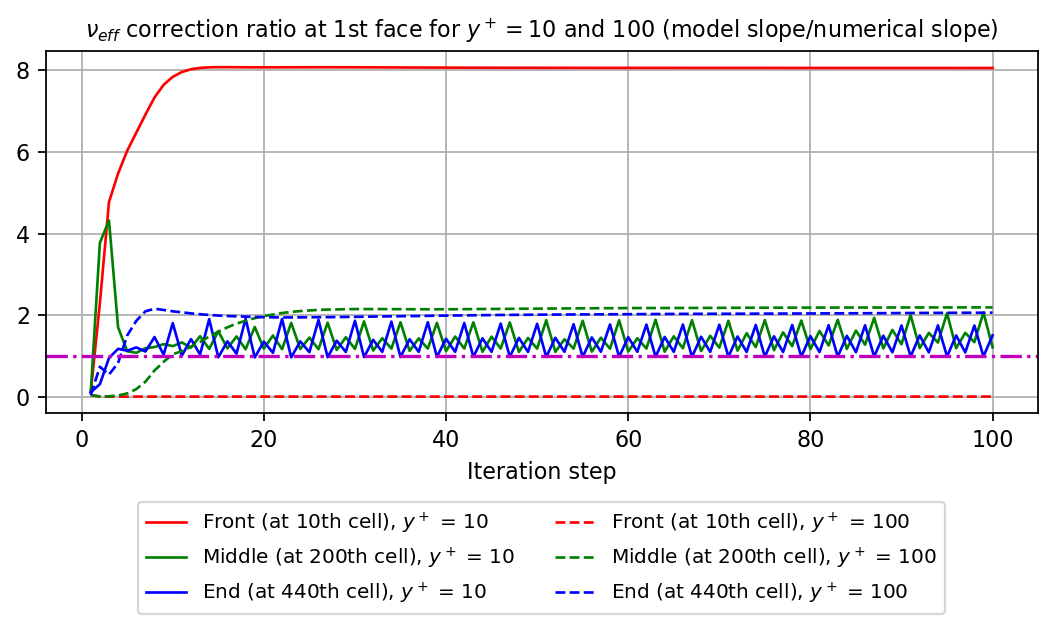

In [8]:
fig2, ax2 = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax2.set_xlabel("Iteration step")
plt.title(r"$\nu_{eff}$ correction ratio at 1st face for $y^+ = 10$ and 100 (model slope/numerical slope)", fontsize = 10)
ax2.plot([i+1 for i in range(it)], [yp10_data2[j]['face_slope'][9]/yp10_data2[j]['magGradU_face'][9] for j in range(it)], ls = style[0], c = "r", lw = lw, label = r"Front (at 10th cell), $y^+$ = 10")
ax2.plot([i+1 for i in range(it)], [yp10_data2[j]['face_slope'][199]/yp10_data2[j]['magGradU_face'][199] for j in range(it)], ls = style[0], c = "g", lw = lw, label = r"Middle (at 200th cell), $y^+$ = 10")
ax2.plot([i+1 for i in range(it)], [yp10_data2[j]['face_slope'][439]/yp10_data2[j]['magGradU_face'][439] for j in range(it)], ls = style[0], c = "b", lw = lw, label = r"End (at 440th cell), $y^+$ = 10")
ax2.plot([i+1 for i in range(it)], [yp100_data2[j]['face_slope'][9]/yp100_data2[j]['magGradU_face'][9] for j in range(it)], ls = style[1], c = "r", lw = lw, label = r"Front (at 10th cell), $y^+$ = 100")
ax2.plot([i+1 for i in range(it)], [yp100_data2[j]['face_slope'][199]/yp100_data2[j]['magGradU_face'][199] for j in range(it)], ls = style[1], c = "g", lw = lw, label = r"Middle (at 200th cell), $y^+$ = 100")
ax2.plot([i+1 for i in range(it)], [yp100_data2[j]['face_slope'][439]/yp100_data2[j]['magGradU_face'][439] for j in range(it)], ls = style[1], c = "b", lw = lw, label = r"End (at 440th cell), $y^+$ = 100")
ax2.axhline(y = 1.0, ls = style[3], c = "m")
plt.legend(ncol=2, fontsize = 9, bbox_to_anchor=(0.5, -0.4), loc='center')
plt.savefig(output + "/2DflatPlate/nuEffCorrectionRatio10.pdf", bbox_inches="tight")

In [9]:
yp005_path = run + 'flatPlate_Re1e7/turbulentFlatPlate_nuEff0.05/yplus_0.05/0.05yp_surfaceFields_iter_{}.csv'.format(it)
yp005_data = pd.read_csv(yp005_path, delim_whitespace=False, index_col=False)
yp005_data.head()

/home/jihookang/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


,x_center,y_face,avg_nuEff
0,0.000486,5.556758e-07,0.000014
1,0.001458,5.556758e-07,0.000014
2,0.002433,5.556758e-07,0.000014
3,0.003410,5.556758e-07,0.000014
4,0.004390,5.556758e-07,0.000014


In [10]:
yp100_path = run + 'flatPlate_Re1e7/turbulentFlatPlate_nuEff100/yplus_100/100yp_surfaceFields_iter_{}.csv'.format(it)
yp100_data = pd.read_csv(yp100_path, delim_whitespace=False, index_col=False)
yp100_data.head()

/home/jihookang/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


,x_center,y_face,avg_nuEff
0,0.000486,0.001045,0.000035
1,0.001458,0.001045,0.000044
2,0.002433,0.001045,0.000056
3,0.003410,0.001045,0.000071
4,0.004390,0.001045,0.000090


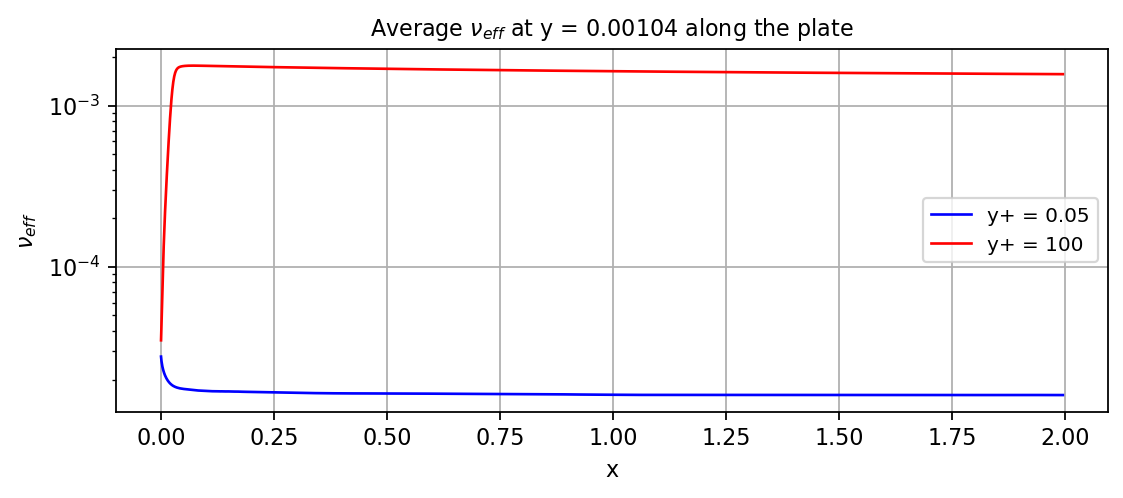

In [11]:
style = ["-", "--", ":", "-."]
lw = 1.2

# y_face_0.05 = 0.001043330676
# y_face_100 = 0.001044526213

fig, ax = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
plt.yscale("log")
ax.set_xlabel("x", fontsize = 10)
ax.set_ylabel(r"$\nu_{eff}$", fontsize = 10)
ax.tick_params(labelsize = 10)
plt.title(r"Average $\nu_{eff}$ at y = 0.00104 along the plate", fontsize = 10)
ax.plot([yp005_data['x_center'][index005 + i] for i in range(449)], [yp005_data['avg_nuEff'][index005 + i] for i in range(449)], ls = style[0], c = "b", lw = lw, label = "y+ = 0.05")
ax.plot([yp100_data['x_center'][i] for i in range(449)], [yp100_data['avg_nuEff'][i] for i in range(449)], ls = style[0], c = "r", lw = lw, label = "y+ = 100")
plt.legend(fontsize = 9)
plt.savefig(output + "/2DflatPlate/averageNuEff_pres.pdf", bbox_inches="tight")